# Question - 02

## (a) Student marks

In [32]:
#import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
#set random seed for reproducibility
np.random.seed(100)

#generate random data
n = 50
OOPs = np.random.randint(0, 51, n)
CSA = np.random.randint(0, 51, n)
Finance = np.random.randint(0, 51, n)
Y = 2 + 0.5*OOPs + 0.3*CSA + 0.1*Finance + np.random.uniform(0, 1, n)
Y = Y / np.max(Y) * 10

#create DataFrame
df = pd.DataFrame({'OOPs': OOPs, 'CSA': CSA, 'Finance': Finance, 'Grade': Y})

#split the data into training and testing sets
X = df.drop(columns='Grade')
y = df['Grade']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4, random_state=0)

df.head()

,OOPs,CSA,Finance,Grade
0,8,49,31,5.723917
1,24,30,50,6.762647
2,3,48,45,5.345723
3,39,47,12,8.834972
4,23,39,33,6.772365


In [11]:
#create linear regression model and fit it on the training data
mlr = LinearRegression()
mlr.fit(X_train,Y_train)

LinearRegression()

### MLR COEFFICIENTS

In [12]:
#get the slope and intercept of the linear regression line
m = mlr.coef_
c = mlr.intercept_

print('slope =', m, "\nand intercept =", c)

slope = [0.1197082  0.07043044 0.02429789] 
and intercept = 0.5380980937703033


In [13]:
#predict the grades for the training data
Y_pred_train = mlr.predict(X_train)
Y_pred_train

array([5.5679288 , 6.29561358, 5.36867306, 8.16982156, 6.16477148,
       7.33574517, 1.45224694, 9.80102152, 2.9299514 , 7.15522388,
       5.74268906, 2.87847511, 5.87809413, 1.95086846, 5.39709194,
       5.26881186, 4.81502861, 6.4264107 , 4.69733721, 6.33592684,
       7.64766707, 6.7389025 , 4.62622479, 6.9066657 , 2.71115833,
       9.98095963, 5.43317658, 5.07505246, 3.66288113, 9.7173283 ,
       5.43430498, 4.4758295 , 5.16844597, 8.80852319, 5.70008987,
       7.1971949 , 8.87572549])

In [14]:
#calculate the R-squared score for the training data
r2_train = r2_score(Y_train, Y_pred_train)
r2_train

0.9988648123872085

### REGRESSION GRAPH

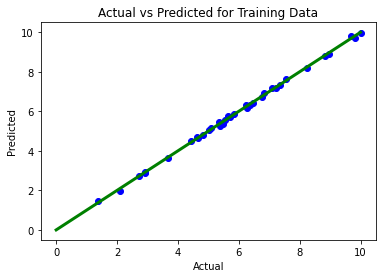

In [16]:
#plot a scatter plot of actual vs predicted grades for the training data
plt.scatter(Y_train, Y_pred_train, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Training Data')
x = np.linspace(0, np.max(Y_train))
plt.plot(x, x, color='green', linewidth=3)
plt.show()

In [17]:
#predict the grades for the testing data
Y_pred_test = mlr.predict(X_test)
Y_pred_test

array([7.25572652, 5.40967274, 3.6338094 , 4.98065848, 5.37128889,
       2.59103284, 9.58658499, 4.11725014, 6.8102796 , 6.84000417,
       2.68083473, 3.36754895, 7.44979114])

In [18]:
#calculate the R-squared score for the testing data
r2_test = r2_score(Y_test, Y_pred_test)
r2_test

0.9993330878569655

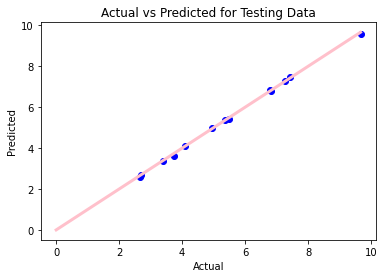

In [22]:
#plot a scatter plot of actual vs predicted grades for the testing data
plt.scatter(Y_test, Y_pred_test, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Testing Data')
x = np.linspace(0, np.max(Y_test))
plt.plot(x, x, color='pink', linewidth=3)
plt.show()

### PREDICT THE OUTPUT FOR A NEW DATAPOINT

In [29]:
#predict the output for a new datapoint
new_data = [[12, 3, 20]]
new_prediction = mlr.predict(new_data)
new_prediction

C:\Users\codes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.67184555])

In [23]:
#create a DataFrame to compare the actual vs predicted values
pred_df = pd.DataFrame({
    'Actual Value': Y_test.ravel(),
    'Predicted Value': Y_pred_test.ravel(),
    'Difference': (Y_test - Y_pred_test).ravel()
})

In [30]:
#print the DataFrame and R-squared scores for both training and testing data
print(pred_df.head())
print(f'R-squared score for training data: {r2_train}')
print(f'R-squared score for testing data: {r2_test}')

   Actual Value  Predicted Value  Difference
0      7.273997         7.255727    0.018271
1      5.488569         5.409673    0.078897
2      3.727790         3.633809    0.093980
3      4.951389         4.980658   -0.029269
4      5.345723         5.371289   -0.025566
R-squared score for training data: 0.9988648123872085
R-squared score for testing data: 0.9993330878569655


### MLR ERRORS

In [33]:
#calculate Mean Absolute Error using inbuilt function
mae_inbuilt = mean_absolute_error(Y_test, Y_pred_test)
mae_inbuilt

0.041761423703217455

In [35]:
#calculate Mean Squared Error using inbuilt function
mse_inbuilt = mean_squared_error(Y_test, Y_pred_test)
mse_inbuilt

0.0027279763466019446

In [36]:
#calculate Sum of Squared Residuals
ssr = ((Y_pred_test - Y_test)**2).sum()
ssr

0.03546369250582528

## (b) Income

In [37]:
#import necessary libraries
from sklearn.datasets import fetch_openml

In [38]:
#load Boston Housing dataset from OpenML
boston = fetch_openml(data_id=531)

# Convert data to pandas DataFrame
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target

# Convert data to numeric format
data = data.apply(pd.to_numeric)

# Split data into training and testing sets
X = data.drop('MEDV', axis=1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [40]:
#train a linear regression model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

### MLR COEFFICIENTS

In [41]:
#get model coefficients and intercept
m = mlr.coef_
c = mlr.intercept_
print (m, c, sep='\n')

[-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]
37.937107741833486


In [43]:
#make predictions on training data and calculate R-squared
y_pred_train = mlr.predict(X_train)
y_pred_train

array([ 4.58009023, 28.38354012, 17.27775551, 29.39070404, 20.54476971,
       15.75754584, 17.6247808 , 12.49442278,  9.22920189, 18.99918727,
       34.41440638, 32.93511107, 23.12483827, 19.46710569, 22.74964337,
       26.62358085, 21.76687195, 16.99819925, 31.96065524, 10.83525249,
       19.40870301, 32.61288955, 18.95461969, 15.98186378, 18.61712222,
       14.38842624, 24.83097587, 23.82401975, 16.76826477, 13.84580415,
       20.0779166 , 24.92266767, 17.16189624, 24.8364039 , 22.24174572,
       27.56012394, 35.90604682, 17.04440455, 12.33400373, 34.74493343,
       30.90136127, 20.49045946, 39.64478915, 29.13249385, 29.01388038,
       17.54994965, 26.93066272, 40.12543441, 28.81755964, 16.66961044,
       37.3921316 , 35.14109319, 13.69652069, 29.0202751 , 21.51233536,
       24.20704328, 21.46319361, 23.80022518, 27.71918267, 29.6616371 ,
       14.66010846, 25.7422347 , 23.1487446 , 13.27417646, 13.9336657 ,
       25.4021242 , 19.33272476, 30.47117826, 11.02963187, 23.62

In [44]:
r2_train = r2_score(y_train, y_pred_train)
r2_train

0.7645451026942549

### REGRESSION GRAPH

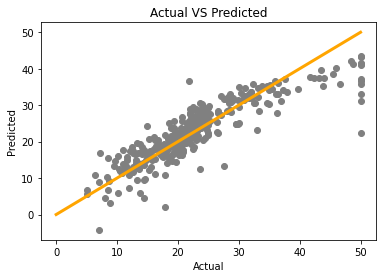

In [47]:
#plot actual vs predicted values for training data
plt.scatter(y_train, y_pred_train, color='gray')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')
x = np.linspace(0, np.max(y_train))
plt.plot(x, x, color='orange', linewidth=3)
plt.show()

In [48]:
#make predictions on testing data and calculate R-squared, MAE, and MSE
y_pred_test = mlr.predict(X_test)
y_pred_test

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

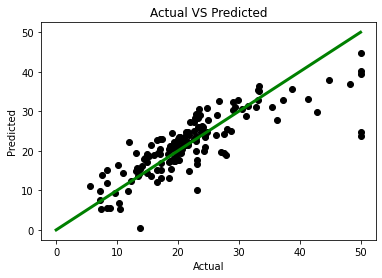

In [51]:
plt.scatter(y_test, y_pred_test, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted')
x = np.linspace(0, np.max(y_test))
plt.plot(x, x, color='green', linewidth = 3)
plt.show()

In [52]:
r2_test = r2_score(y_test, y_pred_test)
r2_test

0.6733825506400171

### PREDICT THE OUTPUT FOR A NEW DATAPOINT

In [58]:
#predict the output for a new datapoint
new_data = [[14, 12, 3, 45, 12.3, 11.333, 73.2323, 1.2, 32, 83, 333.3, 12.3, 100.3]]
new_prediction = mlr.predict(new_data)
new_prediction

C:\Users\codes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-389.75199701])

In [53]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)

### MLR ERRORS

In [54]:
#print R-squared, MAE, and MSE values
print('R-squared on training data:', r2_train)
print('R-squared on testing data:', r2_test)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)

R-squared on training data: 0.7645451026942549
R-squared on testing data: 0.6733825506400171
Mean Absolute Error: 3.60990406038182
Mean Squared Error: 27.195965766883408


In [55]:
#create a DataFrame to compare actual and predicted values for testing data
pred_df = pd.DataFrame({
    'Actual Value': y_test.ravel(),
    'Predicted Value': y_pred_test.ravel(),
    'Difference': (y_test - y_pred_test).ravel()
})

#display the DataFrame
pred_df.head()

,Actual Value,Predicted Value,Difference
0,22.6,24.935708,-2.335708
1,50.0,23.751632,26.248368
2,23.0,29.326383,-6.326383
3,8.3,11.975346,-3.675346
4,21.2,21.372725,-0.172725
